In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as st
import seaborn as sns

from PIL import Image
from matplotlib import pyplot as plt
from scipy import stats

## Загрузка и преобразование данных

In [2]:
x_train = np.load("regression/regression_x_train.npy")
y_train = np.load("regression/regression_y_train.npy")

shape = x_train.shape

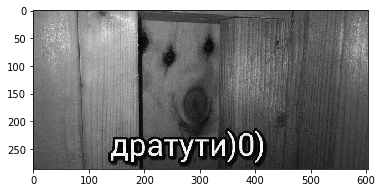

In [3]:
plt.imshow(y_train, cmap='gray')

In [4]:
x_train = x_train.reshape(-1, shape[-1]).T
y_train = y_train.reshape(-1, 1)

data = pd.DataFrame({"x" + str(i): x_train[i] for i in range(len(x_train))})

In [5]:
data["y"] = y_train

## Попробуем самую простую модель

In [6]:
formula = "y ~ " + " + ".join(data.columns[:-1]) + "-1"
formula

'y ~ x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x30 + x31 + x32 + x33 + x34-1'

In [7]:
model0 = st.OLS.from_formula(formula, data).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:59:39   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0         -1.722e-07   4.71e-10   -365.889      0.000   -1.73e-07   -1.71e-07
x1          1.823e-06   5.36e-09    340.455      0.000    1.81e-06    1.83e-06
x2          2.797e-06   4.39e-09    636.411      0.000    2.79e-06    2.81e-06
x3             0.0160      0.000     42.012      0.000       0.015       0.017
x4             0.0133      0.000     35.243      0.000       0.013       0.014
x5         -1.429e-06   2.68e-09   -533.444      0.000   -1.43e-06   -1.42e-06
x6           3.18e-06   7.59e-09    419.136      0.000    3.17e-06     3.2e-06
x7          1.871e-06   3.18e-09    589.149      0.000    1.87e-06    1.88e-06
x8             0.0160      0.000     42.002      0.000       0.015       0.017
x9             0.0133      0.000     35.245      0.000       0.013       0.014
x10         1.581e-07   2.02e-09     78.293      0.000    1.54e-07    1.62e-07
x11         4.313e-07   5.51e-09     78.293      0.000    4.21e-07    4.42e-07
x12         8.381e-07   1.07e-08     78.293      0.000    8.17e-07    8.59e-07
x13         2.795e-05   3.57e-07     78.293      0.000    2.72e-05    2.86e-05
x14            0.0002   4.96e-07    427.850      0.000       0.000       0.000
x15            0.0001   2.36e-07    427.850      0.000       0.000       0.000
x16            0.0005   1.26e-06    427.850      0.000       0.001       0.001
x17            0.0005    1.2e-06    427.850      0.000       0.001       0.001
x18         4.835e-05   7.63e-08    633.760      0.000    4.82e-05    4.85e-05
x19            0.0003   4.42e-07    633.760      0.000       0.000       0.000
x20            0.0008    1.3e-06    633.760      0.000       0.001       0.001
x21            0.0003   5.51e-07    633.760      0.000       0.000       0.000
x22        -1.426e-06   5.32e-08    -26.782      0.000   -1.53e-06   -1.32e-06
x23        -2.968e-05   1.11e-06    -26.782      0.000   -3.19e-05   -2.75e-05
x24        -2.154e-05   8.04e-07    -26.782      0.000   -2.31e-05      -2e-05
x25        -3.056e-05   1.14e-06    -26.782      0.000   -3.28e-05   -2.83e-05
x26        -7.392e-06   2.69e-07    -27.459      0.000   -7.92e-06   -6.86e-06
x27        -6.281e-06   2.29e-07    -27.459      0.000   -6.73e-06   -5.83e-06
x28        -2.392e-05   8.71e-07    -27.459      0.000   -2.56e-05   -2.22e-05
x29        -4.091e-05   1.49e-06    -27.459      0.000   -4.38e-05    -3.8e-05
x30        -1.334e-06   2.38e-09   -560.112      0.000   -1.34e-06   -1.33e-06
x31         4.107e-06   7.33e-09    560.112      0.000    4.09e-06    4.12e-06
x32        -2.993e-08   5.34e-11   -560.112      0.000      -3e-08   -2.98e-08
x33        -2.345e-06   4.19e-09   -560.112      0.000   -2.35e-06   -2.34e-06
x34         1.824e-06   3.26e-09    560.112      0.000    1.82e-06    1.83e-06
==============================================================================
Om

Можно заметить, что изображение получилось не очень красивое. Зато буквы уже на месте ))

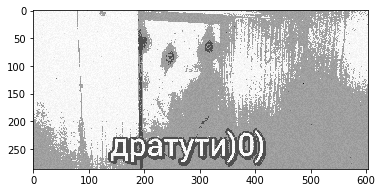

In [8]:
predict = model0.predict(data).values.reshape(shape[:-1])
plt.imshow(predict, cmap='gray')

## Посмотрим на корреляции

In [9]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,y
x0,1,-0.22,-0.21,-0.38,-0.19,1,-0.22,-0.21,-0.38,-0.19,1,1,1,1,-0.22,-0.22,-0.22,-0.22,-0.21,-0.21,-0.21,-0.21,-0.17,-0.17,-0.17,-0.17,-0.1,-0.1,-0.1,-0.1,9.3e-13,4.8e-13,-7.5e-13,2.2e-13,-1.2e-12,-0.43
x1,-0.22,1,-0.91,0.08,-0.54,-0.22,1,-0.91,0.08,-0.54,-0.22,-0.22,-0.22,-0.22,1,1,1,1,-0.91,-0.91,-0.91,-0.91,0.18,0.18,0.18,0.18,-0.37,-0.37,-0.37,-0.37,2.6e-12,2.6e-12,-2e-12,1.8e-12,-2.3e-12,-0.59
x2,-0.21,-0.91,1,0.081,0.62,-0.21,-0.91,1,0.081,0.62,-0.21,-0.21,-0.21,-0.21,-0.91,-0.91,-0.91,-0.91,1,1,1,1,-0.1,-0.1,-0.1,-0.1,0.42,0.42,0.42,0.42,3.9e-12,4.7e-12,-4.7e-12,4.1e-12,-4.3e-12,0.77
x3,-0.38,0.08,0.081,1,0.071,-0.38,0.08,0.081,1,0.071,-0.38,-0.38,-0.38,-0.38,0.08,0.08,0.08,0.08,0.081,0.081,0.081,0.081,0.85,0.85,0.85,0.85,0.04,0.04,0.04,0.04,3.3e-12,3.2e-12,-3.2e-12,3.2e-12,-3.3e-12,0.21
x4,-0.19,-0.54,0.62,0.071,1,-0.19,-0.54,0.62,0.071,1,-0.19,-0.19,-0.19,-0.19,-0.54,-0.54,-0.54,-0.54,0.62,0.62,0.62,0.62,-0.054,-0.054,-0.054,-0.054,0.87,0.87,0.87,0.87,8.9e-14,5.4e-14,-4.5e-14,6.6e-14,-8.3e-14,0.52
x5,1,-0.22,-0.21,-0.38,-0.19,1,-0.22,-0.21,-0.38,-0.19,1,1,1,1,-0.22,-0.22,-0.22,-0.22,-0.21,-0.21,-0.21,-0.21,-0.17,-0.17,-0.17,-0.17,-0.1,-0.1,-0.1,-0.1,-5.7e-14,-1.5e-13,2.5e-14,-2.7e-13,7.8e-13,-0.43
x6,-0.22,1,-0.91,0.08,-0.54,-0.22,1,-0.91,0.08,-0.54,-0.22,-0.22,-0.22,-0.22,1,1,1,1,-0.91,-0.91,-0.91,-0.91,0.18,0.18,0.18,0.18,-0.37,-0.37,-0.37,-0.37,3e-12,3.5e-12,-3.4e-12,3.9e-12,-3.7e-12,-0.59
x7,-0.21,-0.91,1,0.081,0.62,-0.21,-0.91,1,0.081,0.62,-0.21,-0.21,-0.21,-0.21,-0.91,-0.91,-0.91,-0.91,1,1,1,1,-0.1,-0.1,-0.1,-0.1,0.42,0.42,0.42,0.42,-2.4e-12,-1.9e-12,2.6e-12,-1.7e-12,1.6e-12,0.77
x8,-0.38,0.08,0.081,1,0.071,-0.38,0.08,0.081,1,0.071,-0.38,-0.38,-0.38,-0.38,0.08,0.08,0.08,0.08,0.081,0.081,0.081,0.081,0.85,0.85,0.85,0.85,0.04,0.04,0.04,0.04,1e-13,1.5e-13,-8.5e-14,6.1e-14,-2.6e-14,0.21
x9,-0.19,-0.54,0.62,0.071,1,-0.19,-0.54,0.62,0.071,1,-0.19,-0.19,-0.19,-0.19,-0.54,-0.54,-0.54,-0.54,0.62,0.62,0.62,0.62,-0.054,-0.054,-0.054,-0.054,0.87,0.87,0.87,0.87,-3.2e-14,-2.9e-14,3.9e-14,-1.8e-14,-2.4e-15,0.52


In [10]:
exclude = [11, 12, 13, 15, 16, 17, 19, 20, 21, 23, 24, 25, 27, 28, 29, 31]
idxs = ["x" + str(i) for i in range(35) if i not in exclude] + ["y"]
data = data[idxs]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x14,x18,x22,x26,x30,x32,x33,x34,y
x0,1,-0.22,-0.21,-0.38,-0.19,1,-0.22,-0.21,-0.38,-0.19,1,-0.22,-0.21,-0.17,-0.1,9.3e-13,-7.5e-13,2.2e-13,-1.2e-12,-0.43
x1,-0.22,1,-0.91,0.08,-0.54,-0.22,1,-0.91,0.08,-0.54,-0.22,1,-0.91,0.18,-0.37,2.6e-12,-2e-12,1.8e-12,-2.3e-12,-0.59
x2,-0.21,-0.91,1,0.081,0.62,-0.21,-0.91,1,0.081,0.62,-0.21,-0.91,1,-0.1,0.42,3.9e-12,-4.7e-12,4.1e-12,-4.3e-12,0.77
x3,-0.38,0.08,0.081,1,0.071,-0.38,0.08,0.081,1,0.071,-0.38,0.08,0.081,0.85,0.04,3.3e-12,-3.2e-12,3.2e-12,-3.3e-12,0.21
x4,-0.19,-0.54,0.62,0.071,1,-0.19,-0.54,0.62,0.071,1,-0.19,-0.54,0.62,-0.054,0.87,8.9e-14,-4.5e-14,6.6e-14,-8.3e-14,0.52
x5,1,-0.22,-0.21,-0.38,-0.19,1,-0.22,-0.21,-0.38,-0.19,1,-0.22,-0.21,-0.17,-0.1,-5.7e-14,2.5e-14,-2.7e-13,7.8e-13,-0.43
x6,-0.22,1,-0.91,0.08,-0.54,-0.22,1,-0.91,0.08,-0.54,-0.22,1,-0.91,0.18,-0.37,3e-12,-3.4e-12,3.9e-12,-3.7e-12,-0.59
x7,-0.21,-0.91,1,0.081,0.62,-0.21,-0.91,1,0.081,0.62,-0.21,-0.91,1,-0.1,0.42,-2.4e-12,2.6e-12,-1.7e-12,1.6e-12,0.77
x8,-0.38,0.08,0.081,1,0.071,-0.38,0.08,0.081,1,0.071,-0.38,0.08,0.081,0.85,0.04,1e-13,-8.5e-14,6.1e-14,-2.6e-14,0.21
x9,-0.19,-0.54,0.62,0.071,1,-0.19,-0.54,0.62,0.071,1,-0.19,-0.54,0.62,-0.054,0.87,-3.2e-14,3.9e-14,-1.8e-14,-2.4e-15,0.52


Заметим, что столбцы $0-4$ очень похожи на $5-9$ и $10, 14, 18$. Удалим их.


In [11]:
exclude.extend([5, 6, 7, 8, 9, 10, 14, 18, 33, 34])
idxs = ["x" + str(i) for i in range(35) if i not in exclude]  + ["y"]
data = data[idxs]
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,x0,x1,x2,x3,x4,x22,x26,x30,x32,y
x0,1,-0.22,-0.21,-0.38,-0.19,-0.17,-0.1,9.3e-13,-7.5e-13,-0.43
x1,-0.22,1,-0.91,0.08,-0.54,0.18,-0.37,2.6e-12,-2e-12,-0.59
x2,-0.21,-0.91,1,0.081,0.62,-0.1,0.42,3.9e-12,-4.7e-12,0.77
x3,-0.38,0.08,0.081,1,0.071,0.85,0.04,3.3e-12,-3.2e-12,0.21
x4,-0.19,-0.54,0.62,0.071,1,-0.054,0.87,8.9e-14,-4.5e-14,0.52
x22,-0.17,0.18,-0.1,0.85,-0.054,1,-0.04,-1.2e-13,1.2e-13,0.0014
x26,-0.1,-0.37,0.42,0.04,0.87,-0.04,1,-4.7e-13,4.8e-13,0.33
x30,9.3e-13,2.6e-12,3.9e-12,3.3e-12,8.9e-14,-1.2e-13,-4.7e-13,1,-1,1e-14
x32,-7.5e-13,-2e-12,-4.7e-12,-3.2e-12,-4.5e-14,1.2e-13,4.8e-13,-1,1,-1e-14
y,-0.43,-0.59,0.77,0.21,0.52,0.0014,0.33,1e-14,-1e-14,1


Уже намного лучше

In [12]:
formula = "y ~ " + " + ".join(data.columns[:-1])
formula

'y ~ x0 + x1 + x2 + x3 + x4 + x22 + x26 + x30 + x32'

In [13]:
model1 = st.OLS.from_formula(formula , data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:59:43   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.751e+09   2.51e+09      0.699      0.485   -3.16e+09    6.66e+09
x0         -6.708e+08    9.6e+08     -0.699      0.485   -2.55e+09    1.21e+09
x1         -6.708e+08    9.6e+08     -0.699      0.485   -2.55e+09    1.21e+09
x2         -6.708e+08    9.6e+08     -0.699      0.485   -2.55e+09    1.21e+09
x3             0.0321      0.001     42.006      0.000       0.031       0.034
x4             0.0266      0.001     35.250      0.000       0.025       0.028
x22           -0.0016   5.97e-05    -26.781      0.000      -0.002      -0.001
x26           -0.0003   1.15e-05    -27.453      0.000      -0.000      -0.000
x30         6.758e+08   9.67e+08      0.699      0.485   -1.22e+09    2.57e+09
x32        -7.517e+07   1.08e+08     -0.699      0.485   -2.86e+08    1.36e+08
==============================================================================
Omnibus:                    41270.509   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125074.004
Skew:                           1.236   Prob(JB):                         0.00
Kurtosis:                       6.356   Cond. No.                     2.73e+30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-53. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

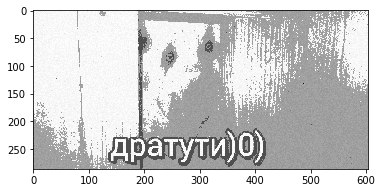

In [14]:
predict = model1.predict(data).values.reshape(shape[:-1])
plt.imshow(predict, cmap='gray')

In [15]:
model1.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                     F                      P>F  df constraint  df denom
Intercept     0.488245       0.4847122860048674              1  172737.0
x0            0.488245      0.48471228603060024              1  172737.0
x1            0.488245       0.4847122861077986              1  172737.0
x2            0.488245      0.48471228621073037              1  172737.0
x3         1764.542226                      0.0              1  172737.0
x4         1242.573532  3.1653009035123246e-271              1  172737.0
x22         717.242386  1.1211244311502316e-157              1  172737.0
x26         753.677794  1.4476502537540053e-165              1  172737.0
x30           0.488245       0.4847122861077986              1  172737.0
x32           0.488245      0.48471228603060024              1  172737.0

## Посмотрим на взаимодействие признаков, чтобы не удалить ничего лишнего

In [16]:
formula = "y ~ " + " + ".join(data.columns[:-1])

for f1 in range(len(data.columns[:-1])):
    for f2 in range(f1+1, len(data.columns[:-1])):
        formula2 = formula + " + {0}:{1}".format(data.columns[:-1][f1], data.columns[:-1][f2])
        lm = st.OLS.from_formula(formula2, data).fit()
        for name, p in lm.pvalues.iteritems():
            if ':' in name and p < 0.05:        
                print (name, p)

x1:x3 0.0
x1:x4 0.0
x1:x22 0.0
x1:x26 0.0
x2:x3 0.0
x2:x4 0.0
x2:x22 0.0
x2:x26 0.0
x3:x4 0.0
x3:x22 6.3591274849226455e-37
x3:x26 0.0
x4:x22 0.0
x4:x26 0.0
x22:x26 0.0


In [17]:
model_all = st.OLS.from_formula(formula, data).fit()

anova = st.stats.anova_lm(model_all, typ=1)
for id, p in enumerate(anova['PR(>F)']):
    if p < 0.05:
        print(anova.iloc[id].name, p)

x0 0.0
x1 0.0
x3 1.12354475e-315
x4 1.3039374772959216e-115
x22 6.909715449488234e-158
x26 1.1680459994671206e-165


In [18]:
formula

'y ~ x0 + x1 + x2 + x3 + x4 + x22 + x26 + x30 + x32'

In [19]:
model2 = st.OLS.from_formula("y ~ x0 + x1 + x2 + x3 + x4 + x22 + x26" , data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:59:56   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.73e+09   2.53e+09      0.683      0.495   -3.24e+09     6.7e+09
x0         -8.622e+08   1.26e+09     -0.683      0.495   -3.34e+09    1.61e+09
x1         -8.622e+08   1.26e+09     -0.683      0.495   -3.34e+09    1.61e+09
x2         -8.622e+08   1.26e+09     -0.683      0.495   -3.34e+09    1.61e+09
x3             0.0321      0.001     42.007      0.000       0.031       0.034
x4             0.0266      0.001     35.248      0.000       0.025       0.028
x22           -0.0016   5.97e-05    -26.783      0.000      -0.002      -0.001
x26           -0.0003   1.15e-05    -27.461      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    41350.831   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125557.072
Skew:                           1.238   Prob(JB):                         0.00
Kurtosis:                       6.364   Cond. No.                     8.91e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

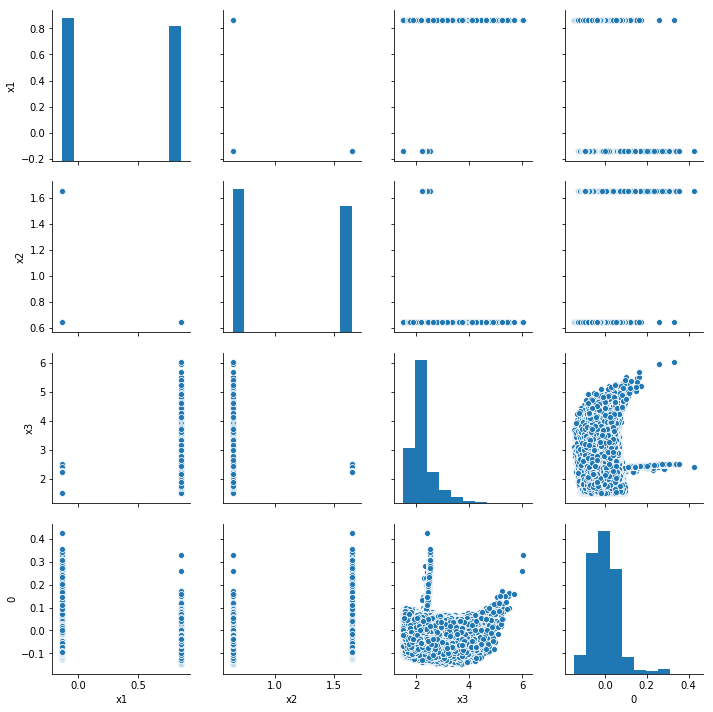

In [20]:
sns.pairplot(pd.concat([data[[ 'x1', 'x2', 'x3']], model2.resid],axis=1))

## Найдем категориальные признаки

x0


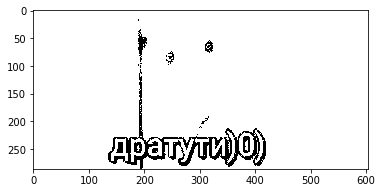

x1


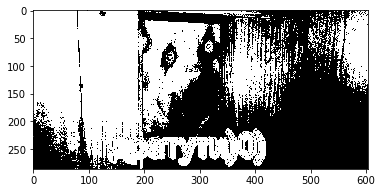

x2


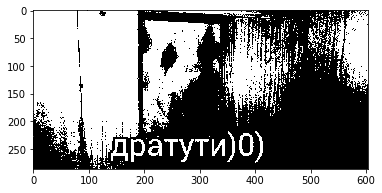

x30


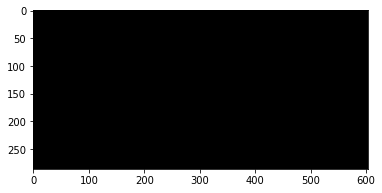

x32


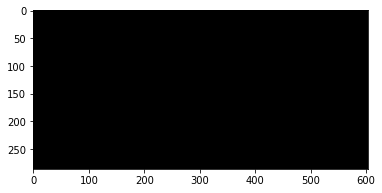

In [21]:
for col in data.columns:
    if data[col].unique().shape[0] <= 2:
        print(col)
        x1 = (data[col] == data[col].unique()[0]).astype(np.int).values
        plt.imshow(x1.reshape(shape[:-1]), cmap='gray')
        plt.show()

Собственно, из трактовка очевидна, некоторые пороговые функции

In [22]:
model3 = st.OLS.from_formula("y ~ C(x0) + C(x1) + C(x2) + x3 + x4 + x22 + x26" , data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:00:18   Log-Likelihood:             2.2548e+05
No. Observations:              172744   AIC:                        -4.509e+05
Df Residuals:                  172737   BIC:                        -4.509e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.3667      0.001    371.450      0.000       0.365       0.369
C(x0)[T.1.4967141530112327]    -0.0173      0.001    -29.802      0.000      -0.018      -0.016
C(x1)[T.0.8617356988288154]     0.1149      0.000    232.776      0.000       0.114       0.116
C(x2)[T.1.6476885381006925]     0.2692      0.001    460.914      0.000       0.268       0.270
x3                              0.0321      0.001     42.007      0.000       0.031       0.034
x4                              0.0266      0.001     35.244      0.000       0.025       0.028
x22                            -0.0016   5.97e-05    -26.782      0.000      -0.002      -0.001
x26                            -0.0003   1.15e-05    -27.459      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    41294.228   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125232.942
Skew:                           1.237   Prob(JB):                         0.00
Kurtosis:                       6.359   Cond. No.                     6.15e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.05e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

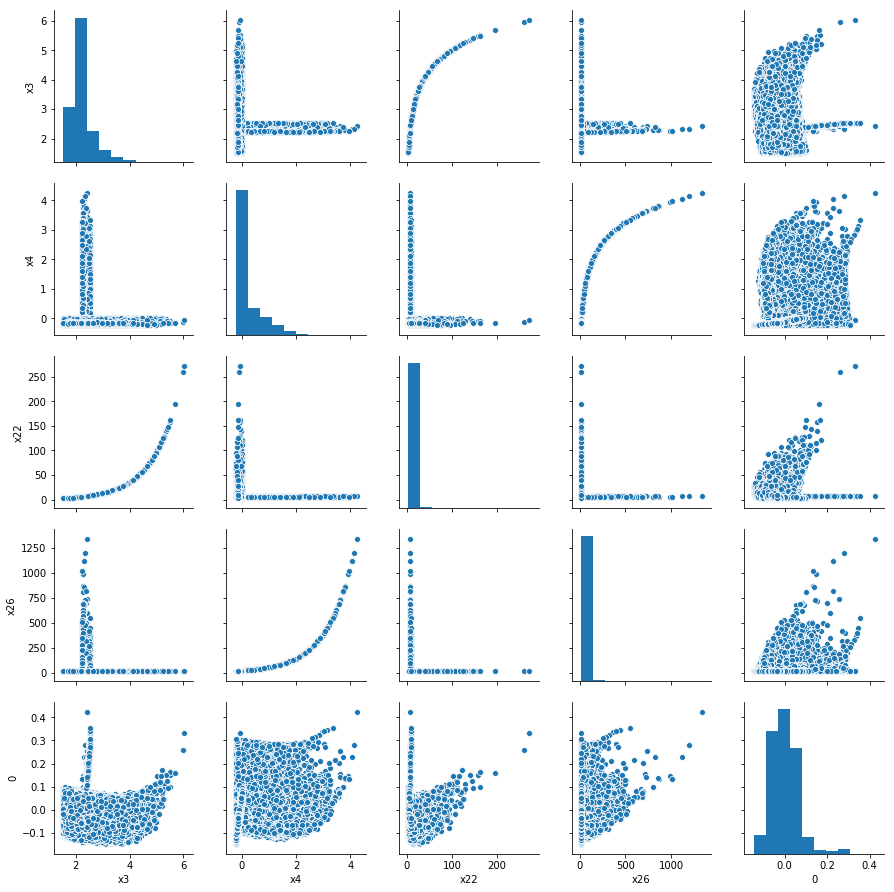

In [23]:
sns.pairplot(pd.concat([data[[ 'x3', 'x4', 'x22', "x26"]], model2.resid],axis=1))

Попробуем сделать данные чуть более схожими с нормальным

Не понятно, что сделать со ступенькой 

In [24]:
lambdas = {}

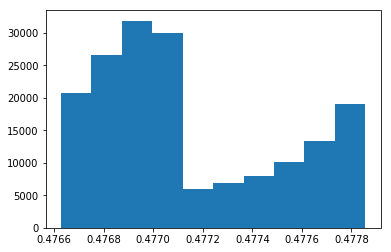

In [25]:
log_x26, lamb = stats.boxcox(data['x26'] + 2)
log_x26 = log_x26.reshape(-1,1)
lambdas[26] = lamb

# plt.hist(data["x26"])

plt.hist(log_x26)
data["log26"] = log_x26

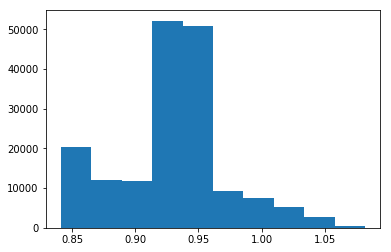

In [26]:
log_x22, lamb = stats.boxcox(data['x22'] + 2)
log_x22 = log_x22.reshape(-1,1)
lambdas[22] = lamb

plt.hist(log_x22)
data["log22"] = log_x22

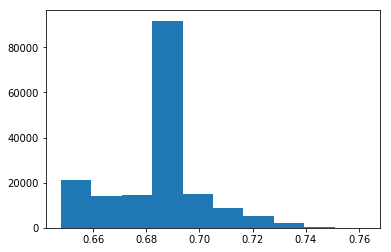

In [27]:
log_x3, lamb = stats.boxcox(data['x3'] + 2)
log_x3 = log_x3.reshape(-1,1)
lambdas[3] = lamb

plt.hist(log_x3)
data["log3"] = log_x3

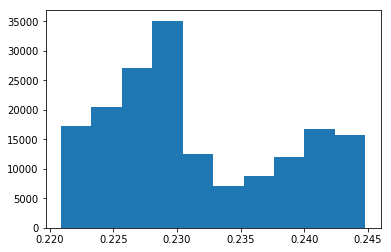

In [28]:
log_x4, lamb = stats.boxcox(data['x4'] + 2)
log_x4 = log_x4.reshape(-1,1)
lambdas[4] = lamb


log_x4 = stats.boxcox(data["x4"] + 2)[0].reshape(-1,1)
plt.hist(log_x4)
data["log4"] = log_x4

##  Немного магии
Вроде бы все признкаи значимые, попробуем добавить что-нибудь еще.  
Путем пары экспериментов найдены более менее подходящие функции.

In [29]:
model3 = st.OLS.from_formula("y ~ x0 + x1 + x2 + x3 + x4 + x22 + x26 + np.sin(x22) + np.sin(x26) + np.cos(x22) + np.cos(x26) + log3 + log22 + log4 +log26" , data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 5.045e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):               0.00
Time:                        01:00:50   Log-Likelihood:             2.6722e+05
No. Observations:              172744   AIC:                        -5.344e+05
Df Residuals:                  172729   BIC:                        -5.343e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.619e+08   1.99e+09      0.433      0.665   -3.04e+09    4.76e+09
x0          -4.296e+08   9.92e+08     -0.433      0.665   -2.37e+09    1.51e+09
x1          -4.296e+08   9.92e+08     -0.433      0.665   -2.37e+09    1.51e+09
x2          -4.296e+08   9.92e+08     -0.433      0.665   -2.37e+09    1.51e+09
x3             -0.1769      0.005    -38.263      0.000      -0.186      -0.168
x4              0.0427      0.002     24.500      0.000       0.039       0.046
x22            -0.0005      0.000     -3.435      0.001      -0.001      -0.000
x26            -0.0003   1.46e-05    -21.564      0.000      -0.000      -0.000
np.sin(x22)     0.0441      0.000    152.734      0.000       0.044       0.045
np.sin(x26)     0.0060      0.000     27.564      0.000       0.006       0.006
np.cos(x22)    -0.0476      0.000   -158.511      0.000      -0.048      -0.047
np.cos(x26)     0.0157      0.000     67.817      0.000       0.015       0.016
log3           21.6548      0.458     47.296      0.000      20.757      22.552
log22          -6.4889      0.185    -34.982      0.000      -6.852      -6.125
log4           53.8160      0.579     92.974      0.000      52.682      54.950
log26       -1003.7976     11.757    -85.379      0.000   -1026.841    -980.754
==============================================================================
Omnibus:                    31013.685   Durbin-Watson:                   1.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81960.611
Skew:                           0.981   Prob(JB):                         0.00
Kurtosis:                       5.745   Cond. No.                     8.91e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Тест

In [30]:
x_test = np.load("regression/regression_x_test.npy")
shape_test = x_test.shape

x_test = x_test.reshape(-1, shape_test[-1]).T
data_test = pd.DataFrame({"x" + str(i): x_test[i] for i in range(len(x_test))})

In [31]:
data_test["log3"] = stats.boxcox(data_test["x3"] + 2, lambdas[3])
data_test["log4"] = stats.boxcox(data_test["x4"] + 2, lambdas[4])
data_test["log22"] = stats.boxcox(data_test["x22"] + 2, lambdas[22])
data_test["log26"] = stats.boxcox(data_test["x26"] + 2, lambdas[26])

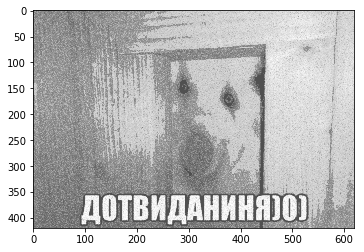

In [32]:
predict = model3.predict(data_test).values.reshape(shape_test[:-1])
plt.imshow(predict, cmap='gray')

# BINGO